In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
  
data = [32, 36, 46, 47, 56, 69, 75, 79, 79, 88, 89, 91, 92, 93, 96, 97,  
        101, 105, 112, 116] 
  
# First quartile (Q1) 
Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
  
print(Q1,IQR,Q3) 

62.5 34.0 96.5


In [2]:

  
data = [32, 36, 46, 47, 56, 69, 75, 79, 79, 83, 89, 92, 92, 93, 96, 97,  
        101, 105, 112, 116] 
  
# Interquartile range (IQR) 
IQR = stats.iqr(data, interpolation = 'midpoint') 
  
print(IQR) 

34.0


In [4]:
data = 'https://gist.githubusercontent.com/baskaufs/1a7a995c1b25d6e88b45/raw/4bb17ccc5c1e62c27627833a4f25380f27d30b35/t-test.csv'
df = pd.read_csv(data)

df.head(20)

grouping  height
0       men   181.5
1       men   187.3
2       men   175.3
3       men   178.3
4       men   169.0
5       men   183.2
6       men   184.5
7     women   175.4
8     women   172.1
9     women   181.1
10    women   165.2
11    women   166.3
12    women   167.0
13    women   170.3

In [5]:
# create Subset of data
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']

In [6]:
df.groupby('grouping').describe()

height                                                           
          count        mean       std    min     25%    50%     75%    max
grouping                                                                  
men         7.0  179.871429  6.216836  169.0  176.80  181.5  183.85  187.3
women       7.0  171.057143  5.697619  165.2  166.65  170.3  173.75  181.1

array([[<AxesSubplot:title={'center':'height'}>]], dtype=object)

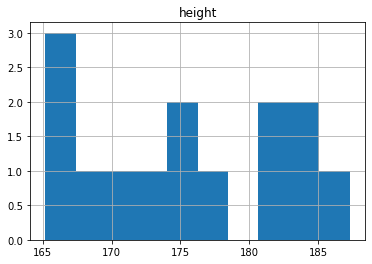

In [8]:
df.hist()

In [9]:
stats.shapiro(male)

ShapiroResult(statistic=0.9550848603248596, pvalue=0.7756242156028748)

In [10]:
stats.shapiro(female)

ShapiroResult(statistic=0.9197608828544617, pvalue=0.467536598443985)

In [11]:
"""
we don't worry too much about the test 
statistic just the p-value - as > 0.05 we can be confident data is normally distributed

we use scipy to then do the t-test (small sample testing two samples)
"""
height_diff = stats.ttest_ind(male, female, 
                      equal_var=True)

display(height_diff)


#there is a difference between the two means as p < 0.05 so we can say the difference is not by chance

Ttest_indResult(statistic=2.765444762721087, pvalue=0.017105701528166175)

<AxesSubplot:xlabel='grouping', ylabel='height'>

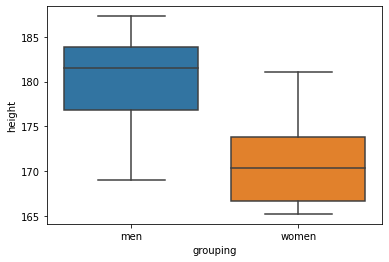

In [12]:
import seaborn as sns

sns.boxplot(x='grouping', y='height', data=df)